In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib

print("Matplotlib version", matplotlib.__version__)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Matplotlib version 3.3.4


In [66]:
%config InlineBackend.figure_format = 'retina'
sys_font=fm.findSystemFonts()
path = './NanumGothic.ttf'  # 그래프 오류로 인한 글꼴 설치
font_name = fm.FontProperties(fname=path, size=10).get_name()
plt.rc('font', family=font_name)
matplotlib.font_manager._rebuild()
print('설치가 되었습니다.')

설치가 되었습니다.


In [67]:
df = pd.read_csv('./ccbread_data.csv', low_memory=False, dtype={'건물소유구분명': object, '전통업소지정번호': object}) 
#Warning 없애기 위해서 추가

In [68]:
df.dtypes.to_frame().reset_index().head()

,index,0
0,번호,int64
1,개방서비스명,object
2,개방서비스id,object
3,개방자치단체코드,int64
4,관리번호,object


In [69]:
df.shape # 행과 열의 개수를 확인

(52680, 48)

In [70]:
df.head(1) # df의 첫번째 1열만 출력해서 확인

,번호,개방서비스명,개방서비스id,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태구분코드,영업상태명,상세영업상태코드,...,공장생산직종업원수,건물소유구분명,보증액,월세액,다중이용업소여부,시설총규모,전통업소지정번호,전통업소주된음식,홈페이지,Unnamed: 47
0,1,제과점영업,07_22_18_P,3600000,3600000-121-2013-00002,20130201,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,N,146.4,NaN,NaN,NaN,NaN


In [71]:
df.info(memory_usage='deep') # 메모리 사용량 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52680 entries, 0 to 52679
Data columns (total 48 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   번호           52680 non-null  int64  
 1   개방서비스명       52680 non-null  object 
 2   개방서비스id      52680 non-null  object 
 3   개방자치단체코드     52680 non-null  int64  
 4   관리번호         52680 non-null  object 
 5   인허가일자        52680 non-null  int64  
 6   인허가취소일자      0 non-null      float64
 7   영업상태구분코드     52680 non-null  int64  
 8   영업상태명        52680 non-null  object 
 9   상세영업상태코드     52680 non-null  int64  
 10  상세영업상태명      52680 non-null  object 
 11  폐업일자         33669 non-null  float64
 12  휴업시작일자       0 non-null      float64
 13  휴업종료일자       0 non-null      float64
 14  재개업일자        0 non-null      float64
 15  소재지전화        31967 non-null  object 
 16  소재지면적        49047 non-null  object 
 17  소재지우편번호      50885 non-null  float64
 18  소재지전체주소      52513 non-null  object 
 19  도로명전

In [72]:
df['상세영업상태명'].value_counts() # 영업상태 데이터를 뽑아온다.

폐업    33669
영업    19011
Name: 상세영업상태명, dtype: int64

In [73]:
df['상세영업상태명'].value_counts(normalize=True, dropna=False) # 폐업률 확인

폐업    0.639123
영업    0.360877
Name: 상세영업상태명, dtype: float64

In [74]:
df['상세영업상태코드'].value_counts()   # 1: 영업, 2: 폐업

2    33669
1    19011
Name: 상세영업상태코드, dtype: int64

In [75]:
bread = df[['인허가일자', '상세영업상태코드', '폐업일자', '소재지전체주소', '사업장명', '업태구분명']] #필요한 데이터만 필터링
bread.head(3)

,인허가일자,상세영업상태코드,폐업일자,소재지전체주소,사업장명,업태구분명
0,20130201,1,NaN,"광주광역시 서구 치평동 1177-2번지 (106,107호)",뚜레쥬르상무역점,제과점영업
1,20130318,1,NaN,광주광역시 서구 유촌동 868-1번지 (102호),뚜레쥬르광주버들마을점,제과점영업
2,20130417,1,NaN,광주광역시 서구 화정동 1611번지 101호102호103호 상가2동,파리바게뜨화정현대점,제과점영업


In [76]:
bread['소재지전체주소'].str.split().str[0] # 주소의 시/도 정보를 추출

0        광주광역시
1        광주광역시
2        광주광역시
3        광주광역시
4        광주광역시
         ...  
52675    울산광역시
52676    광주광역시
52677    부산광역시
52678      경기도
52679      경기도
Name: 소재지전체주소, Length: 52680, dtype: object

In [77]:
bread['업태구분명'].value_counts(dropna=False)

제과점영업    52653
푸드트럭        16
NaN          6
룸살롱          1
과자점          1
기타           1
분식           1
한식           1
Name: 업태구분명, dtype: int64

In [78]:
condition1 = bread['소재지전체주소'].str.split().str[1] == '청주시'
condition2 = bread['업태구분명'] == '제과점영업'
bread = bread[condition1 & condition2] # 청주시의 제과점영업만 추출
bread.head(4) #샘플4개 확인

,인허가일자,상세영업상태코드,폐업일자,소재지전체주소,사업장명,업태구분명
1493,20190109,1,NaN,충청북도 청주시 상당구 서문동 157-14,홈플러스(주)베이커리행사매대,제과점영업
1505,20190214,1,NaN,충청북도 청주시 청원구 주중동 1054번지 103호,미쓰콩,제과점영업
3998,20190521,1,NaN,충청북도 청주시 서원구 분평동 1258,파리바게뜨분평주은,제과점영업
4068,20190520,1,NaN,충청북도 청주시 상당구 수동 315-24번지 1층,종달새빵집,제과점영업


In [79]:
print(df.shape, bread.shape) # 전국 제과점에서 청주 제과점만 뽑아냈을때 행/열 정보 확인 

(52680, 48) (820, 6)


In [80]:
bread['구명'] = bread['소재지전체주소'].str.split().str[2]
bread['동명'] = bread['소재지전체주소'].str.split().str[3]
bread.columns

Index(['인허가일자', '상세영업상태코드', '폐업일자', '소재지전체주소', '사업장명', '업태구분명', '구명', '동명'], dtype='object')

In [81]:
bread.to_csv('ccbread_save.csv', index=False)
bread.head(3) # 새로운 columns 추가된것을 확인

,인허가일자,상세영업상태코드,폐업일자,소재지전체주소,사업장명,업태구분명,구명,동명
1493,20190109,1,NaN,충청북도 청주시 상당구 서문동 157-14,홈플러스(주)베이커리행사매대,제과점영업,상당구,서문동
1505,20190214,1,NaN,충청북도 청주시 청원구 주중동 1054번지 103호,미쓰콩,제과점영업,청원구,주중동
3998,20190521,1,NaN,충청북도 청주시 서원구 분평동 1258,파리바게뜨분평주은,제과점영업,서원구,분평동


In [82]:
import numpy as np
s = pd.Series([pd.NA, np.nan])
s.value_counts(dropna=False)

NaN    2
dtype: int64

In [83]:
bread.isna().sum() # 각 columns별 결측치 개수 확인

인허가일자         0
상세영업상태코드      0
폐업일자        307
소재지전체주소       0
사업장명          0
업태구분명         0
구명            0
동명            0
dtype: int64

In [84]:
bread[bread['폐업일자'].isna()] # 상태코드1은 영업 중을 의미. Nan을 그냥 놔두기에는 깔끔하지 못하다.

,인허가일자,상세영업상태코드,폐업일자,소재지전체주소,사업장명,업태구분명,구명,동명
1493,20190109,1,NaN,충청북도 청주시 상당구 서문동 157-14,홈플러스(주)베이커리행사매대,제과점영업,상당구,서문동
1505,20190214,1,NaN,충청북도 청주시 청원구 주중동 1054번지 103호,미쓰콩,제과점영업,청원구,주중동
3998,20190521,1,NaN,충청북도 청주시 서원구 분평동 1258,파리바게뜨분평주은,제과점영업,서원구,분평동
4068,20190520,1,NaN,충청북도 청주시 상당구 수동 315-24번지 1층,종달새빵집,제과점영업,상당구,수동
4087,20190513,1,NaN,충청북도 청주시 흥덕구 송절동 850번지 테크노폴리스우미린,뚜레쥬르 테크노폴리스점,제과점영업,흥덕구,송절동
...,...,...,...,...,...,...,...,...
18718,20201222,1,NaN,충청북도 청주시 흥덕구 봉명동 980-3,해피투유(happy to you),제과점영업,흥덕구,봉명동
18719,20210104,1,NaN,충청북도 청주시 흥덕구 가경동 644-5,파리바게뜨 서현홍골지구점,제과점영업,흥덕구,가경동
18759,20201124,1,NaN,충청북도 청주시 흥덕구 가경동 383-7,그린브라우니 가경점,제과점영업,흥덕구,가경동
18833,20201229,1,NaN,충청북도 청주시 서원구 현도면 선동리 284-7 죽암(하)휴게소 1층,경주제과 죽암(부산)휴게소점,제과점영업,서원구,현도면


In [85]:
bread['폐업일자'] = bread['폐업일자'].fillna(0.0).astype('int64')
bread.dtypes # 폐업일자 데이터 타입이 int64로 변하여

인허가일자        int64
상세영업상태코드     int64
폐업일자         int64
소재지전체주소     object
사업장명        object
업태구분명       object
구명          object
동명          object
dtype: object

In [86]:
bread.head(3) # 폐업일자의 NaN이 0으로 변한것을 확인

,인허가일자,상세영업상태코드,폐업일자,소재지전체주소,사업장명,업태구분명,구명,동명
1493,20190109,1,0,충청북도 청주시 상당구 서문동 157-14,홈플러스(주)베이커리행사매대,제과점영업,상당구,서문동
1505,20190214,1,0,충청북도 청주시 청원구 주중동 1054번지 103호,미쓰콩,제과점영업,청원구,주중동
3998,20190521,1,0,충청북도 청주시 서원구 분평동 1258,파리바게뜨분평주은,제과점영업,서원구,분평동


In [87]:
bread.isna().any().any() # 결측치가 하나라도 존재하면 Ture. 깔끔하게 없는것을 확인

False

In [88]:
bread = bread.drop(columns=['소재지전체주소', '업태구분명']) # 중복된 정보이므로 필요없는 열 제거
bread.shape

(820, 6)

In [122]:
bread = bread.rename(columns={'상세영업상태코드': '상태코드'}) # 이름이 너무 길어서 짧게 다시 정의
bread.head(5)

,인허가일자,상태코드,폐업일자,사업장명,구명,동명,설립년도,폐업년도,영업기간
0,20190109,1,0,홈플러스(주)베이커리행사매대,상당구,서문동,2019,0,3
1,20190214,1,0,미쓰콩,청원구,주중동,2019,0,3
2,20190521,1,0,파리바게뜨분평주은,서원구,분평동,2019,0,3
3,20190520,1,0,종달새빵집,상당구,수동,2019,0,3
4,20190513,1,0,뚜레쥬르 테크노폴리스점,흥덕구,송절동,2019,0,3


In [90]:
bread.to_csv('ccbread_after.csv', index=False) # 수정된 내용 저장

In [91]:
bread = pd.read_csv('ccbread_after.csv')
bread.head(2) # 잘 반영되었는지 확인

,인허가일자,상태코드,폐업일자,사업장명,구명,동명
0,20190109,1,0,홈플러스(주)베이커리행사매대,상당구,서문동
1,20190214,1,0,미쓰콩,청원구,주중동


In [92]:
temp = bread[['인허가일자', '폐업일자']]
temp.dtypes

인허가일자    int64
폐업일자     int64
dtype: object

In [93]:
year = bread['인허가일자'] // 10000
month = bread['인허가일자'] // 100 % 100
day = bread['인허가일자'] % 100
bread['설립년도'] = bread['인허가일자'] // 10000
bread['폐업년도'] = bread['폐업일자'] // 10000
bread.tail(2)

,인허가일자,상태코드,폐업일자,사업장명,구명,동명,설립년도,폐업년도
818,20201230,2,20210624,카페인중독용암점,상당구,용암동,2020,2021
819,20210208,2,20210218,팥고당(현대충청점),흥덕구,복대동,2021,2021


In [94]:
temp = pd.to_datetime(bread['인허가일자'], format='%Y%m%d')
temp.dt.month

0       1
1       2
2       5
3       5
4       5
       ..
815     1
816     2
817     3
818    12
819     2
Name: 인허가일자, Length: 820, dtype: int64

In [95]:
nyear = 2021    
bread.loc[bread['상태코드']==1,'영업기간'] = nyear - bread['설립년도'] + 1
bread.loc[bread['상태코드']==2,'영업기간'] = bread['폐업년도'] - bread['설립년도'] + 1
bread.tail(3)

,인허가일자,상태코드,폐업일자,사업장명,구명,동명,설립년도,폐업년도,영업기간
817,20070315,2,20160512,쇼콜라떼,상당구,영운동,2007,2016,10.0
818,20201230,2,20210624,카페인중독용암점,상당구,용암동,2020,2021,2.0
819,20210208,2,20210218,팥고당(현대충청점),흥덕구,복대동,2021,2021,1.0


In [96]:
bread.iloc[0, ]

인허가일자           20190109
상태코드                   1
폐업일자                   0
사업장명     홈플러스(주)베이커리행사매대
구명                   상당구
동명                   서문동
설립년도                2019
폐업년도                   0
영업기간                 3.0
Name: 0, dtype: object

In [97]:
def func(x):
    nyear = 2021
    if x['상태코드']==1:
        r = nyear - x['설립년도'] + 1
    else:
        r = x['폐업년도'] - x['설립년도'] + 1
    return r

def func2(x):    
    nyear = 2021
    return nyear - x['설립년도'] + 1 if x['상태코드']==1 else x['폐업년도'] - x['설립년도'] + 1

bread['영업기간'] = bread.apply(lambda x : (nyear - x['설립년도'] + 1) if x['상태코드']==1 else (x['폐업년도'] - x['설립년도'] + 1), axis=1)


In [98]:
temp1 = bread['설립년도'].value_counts().sort_index().to_frame().T
temp1

,1976,1981,1983,1984,1985,1986,1987,1988,1989,1990,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
설립년도,4,1,1,2,2,5,1,4,2,12,...,54,18,41,29,28,37,23,25,49,34


In [99]:
temp2 = bread['폐업년도'].value_counts().sort_index().to_frame().T
temp2

,0,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
폐업년도,307,8,15,25,17,21,46,20,22,16,...,42,22,24,16,26,26,28,28,28,25


In [100]:
temp = pd.concat([temp1, temp2], axis=0, join='outer')
temp # 설립년도 폐업년도 표 합치기

,0,1976,1981,1983,1984,1985,1986,1987,1988,1989,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
설립년도,NaN,4.0,1.0,1.0,2.0,2.0,5.0,1.0,4.0,2.0,...,54,18,41,29,28,37,23,25,49,34
폐업년도,307.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,42,22,24,16,26,26,28,28,28,25


In [101]:
temp.fillna(0).astype('int64') # 결측치 정리

,0,1976,1981,1983,1984,1985,1986,1987,1988,1989,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
설립년도,0,4,1,1,2,2,5,1,4,2,...,54,18,41,29,28,37,23,25,49,34
폐업년도,307,0,0,0,0,0,0,0,0,0,...,42,22,24,16,26,26,28,28,28,25


In [102]:
yyear = temp.T

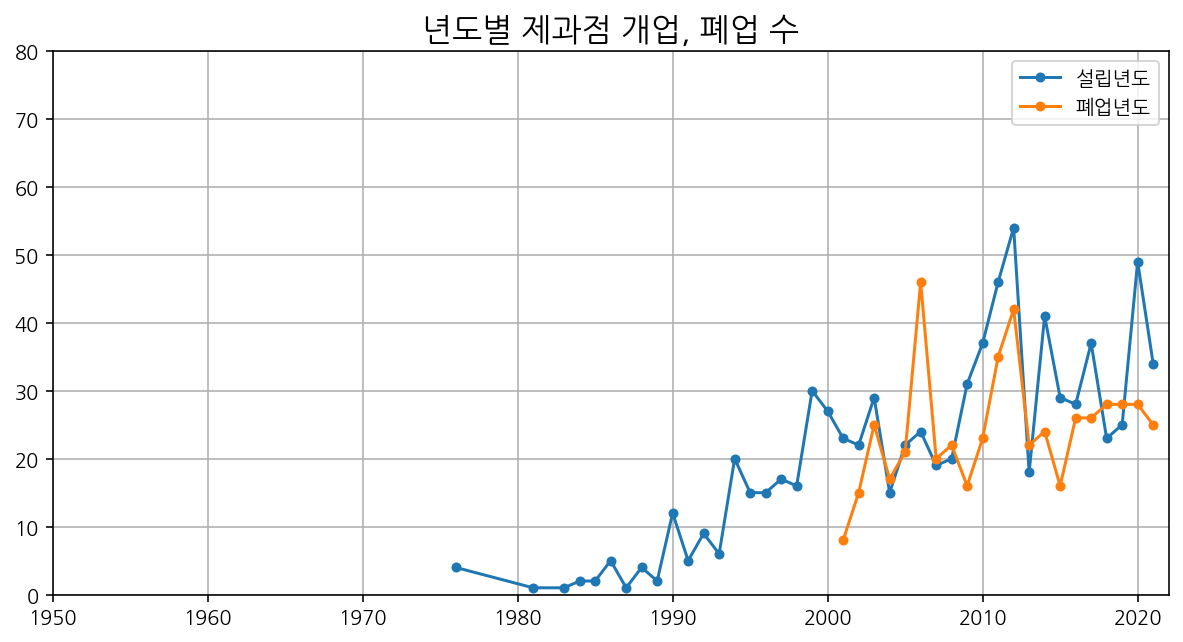

In [103]:

yyear.plot.line(figsize=(10, 5), marker='o', markersize=4)
plt.title('년도별 제과점 개업, 폐업 수', fontsize=16)
plt.xlim([1950, 2022])   
plt.ylim([0, 80])    
plt.grid()

In [104]:
paris = bread.loc[bread['사업장명'].str.contains('파리바게'), :] #파리바게트 or 파리바게뜨로 되어있어서 파리바게로 검색
paris.head(5)

,인허가일자,상태코드,폐업일자,사업장명,구명,동명,설립년도,폐업년도,영업기간
2,20190521,1,0,파리바게뜨분평주은,서원구,분평동,2019,0,3
19,20200210,1,0,파리바게뜨 옥산파크자이,흥덕구,옥산면,2020,0,2
22,20200407,1,0,파리바게뜨청주동남씨티점,상당구,용암동,2020,0,2
47,20210512,1,0,파리바게뜨청주동남우미린점,상당구,방서동,2021,0,1
50,20110121,1,0,파리바게뜨터미널점,흥덕구,가경동,2011,0,11


In [105]:
tous = bread.loc[bread['사업장명'].str.contains('뚜레쥬르'), :]
tous.head(5)

,인허가일자,상태코드,폐업일자,사업장명,구명,동명,설립년도,폐업년도,영업기간
4,20190513,1,0,뚜레쥬르 테크노폴리스점,흥덕구,송절동,2019,0,3
7,20190806,1,0,뚜레쥬르,흥덕구,옥산면,2019,0,3
31,20200720,1,0,뚜레쥬르청주동남점,상당구,용암동,2020,0,2
35,20210726,1,0,뚜레쥬르 성화중앙점,서원구,성화동,2021,0,1
66,20210305,1,0,뚜레쥬르율량점,청원구,율량동,2021,0,1


In [106]:
print(paris.shape, tous.shape) #파리바게뜨 90점 뚜레쥬르 75점

(90, 9) (75, 9)


In [107]:
# 설립년도가 2000년 이후이면서 영업 중인 곳의 영업기간 정보를 구한다.

temp1 = paris.loc[(paris['설립년도']>=2000) & (paris['상태코드']==1), '영업기간']
temp2 = tous.loc[(tous['설립년도']>=2000) & (tous['상태코드']==1), '영업기간']

s = pd.Series([temp1.mean(), temp2.mean()], index=['파리바게뜨', '뚜레쥬르']) # 평균값
comp = pd.DataFrame(s, columns=['영업'])
comp

,영업
파리바게뜨,11.283333
뚜레쥬르,8.829268


In [108]:
# 설립년도 2000년 이후이면서 폐업한 곳의 영업기간 정보를 구한다.

temp1 = paris.loc[(paris['설립년도']>=2000) & (paris['상태코드']==2), '영업기간']
temp2 = tous.loc[(tous['설립년도']>=2000) & (tous['상태코드']==2), '영업기간']

# 평균을 구해 comp에 '폐업' 컬럼으로 추가
comp['폐업'] = [temp1.mean(), temp2.mean()]
comp

,영업,폐업
파리바게뜨,11.283333,5.384615
뚜레쥬르,8.829268,6.050000


In [109]:
# 파리바게트, 뚜레쥬르가 아닌 다른 사업장을 other로 정리
condition1 = (bread['사업장명'].str.contains('파리바게'))
condition2 = (bread['사업장명'].str.contains('뚜레쥬르'))
other = bread.loc[~(condition1 | condition2), :]

other.shape # 655점

(655, 9)

In [110]:
bread.shape[0], paris.shape[0] + tous.shape[0] + other.shape[0] # 청주에 제과점 820점 존재확인

(820, 820)

In [111]:
comp

,영업,폐업
파리바게뜨,11.283333,5.384615
뚜레쥬르,8.829268,6.050000


In [112]:
# other의 2000년 이후 설립된 곳의 영업, 폐업 사업장을 구한다.

temp1 = other.loc[(other['설립년도']>=2000) & (other['상태코드']==1), '영업기간']
temp2 = other.loc[(other['설립년도']>=2000) & (other['상태코드']==2), '영업기간']


# 영업기간 평균을 구해 comp 에 '개인창업' 행으로 추가 append
temp = pd.DataFrame([[temp1.mean(), temp2.mean()]], index=['개인창업'], columns=['영업', '폐업'])
comp = comp.append(temp)
comp

,영업,폐업
파리바게뜨,11.283333,5.384615
뚜레쥬르,8.829268,6.050000
개인창업,6.439560,4.667656


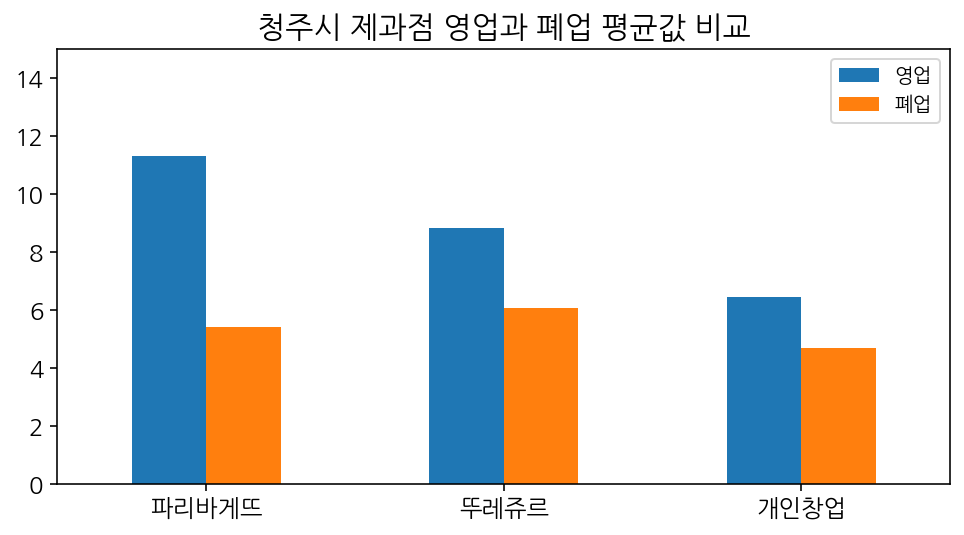

In [113]:
comp.plot.bar(figsize=(8,4), rot=0 )
plt.title('청주시 제과점 영업과 폐업 평균값 비교',fontsize=15)
plt.xticks([0,1,2],['파리바게뜨','뚜레쥬르','개인창업'],fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 15)
plt.show()

In [114]:
temp = paris.loc[paris['상태코드']==1, '구명'].value_counts().to_frame()
temp.head(4)

,구명
흥덕구,22
서원구,19
청원구,15
상당구,15


In [115]:
temp['폐업'] = paris.loc[paris['상태코드']==2, '구명'].value_counts()
temp2 = temp.reset_index()
temp2.head(5)

,index,구명,폐업
0,흥덕구,22,3
1,서원구,19,7
2,청원구,15,4
3,상당구,15,5


In [116]:
temp2.columns = ['구', '영업', '폐업'] #index를 구로 표기
temp2['폐업비율'] = (temp2['폐업'] / (temp2['폐업'] + temp2['영업'])) * 100
temp2.head(5)

,구,영업,폐업,폐업비율
0,흥덕구,22,3,12.000000
1,서원구,19,7,26.923077
2,청원구,15,4,21.052632
3,상당구,15,5,25.000000


In [117]:
temp2.sort_values('폐업비율').head() # 오름차순

,구,영업,폐업,폐업비율
0,흥덕구,22,3,12.000000
2,청원구,15,4,21.052632
3,상당구,15,5,25.000000
1,서원구,19,7,26.923077


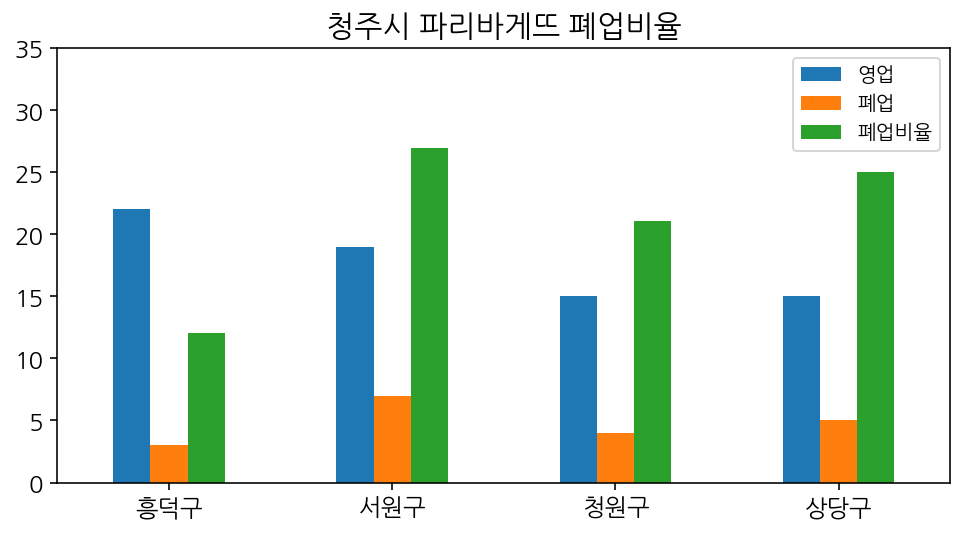

In [118]:
temp2.plot.bar(figsize=(8,4), rot=0 )
plt.title('청주시 파리바게뜨 폐업비율',fontsize=15)
plt.xticks([0,1,2,3],['흥덕구','서원구','청원구','상당구'],fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 35)
plt.show() # 흥덕구에서 제일 잘 되는중

In [119]:
temp = bread.loc[(bread['구명']=='흥덕구')& (bread['상태코드']==1), :]
s = temp['동명'].value_counts()
s

복대동    30
가경동    26
봉명동    11
오송읍    10
비하동     7
옥산면     5
송절동     4
강내면     3
강서동     2
운천동     2
화계동     1
신봉동     1
석곡동     1
Name: 동명, dtype: int64

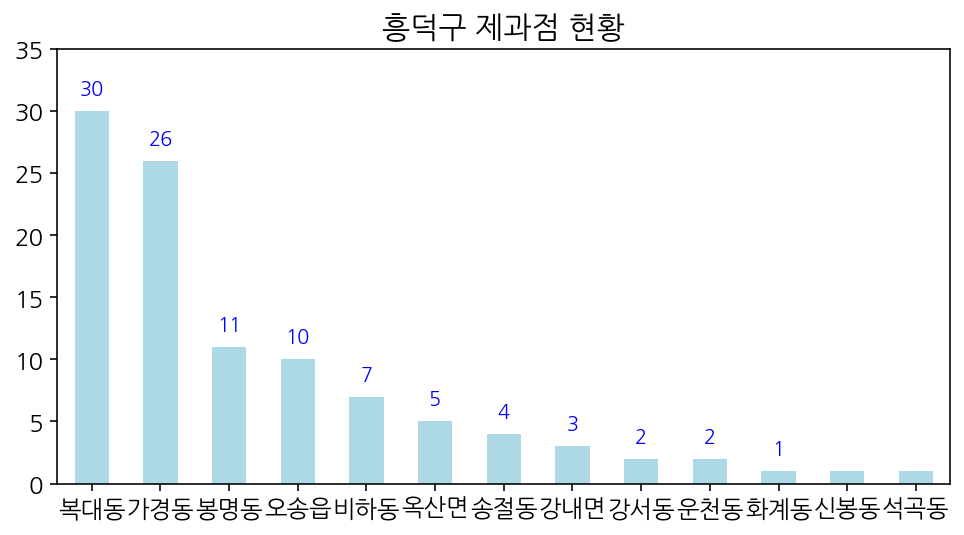

In [120]:
s.plot.bar(figsize=(8,4), rot=0, color='lightblue')
plt.title('흥덕구 제과점 현황',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 35)
y = s.values
for i, v in enumerate(range(11)):
    plt.text(v, y[i]+1, round(y[i], 1),   
             fontsize = 10, 
             color='blue',
             horizontalalignment='center', 
             verticalalignment='bottom')    

#plt.grid()
plt.show()

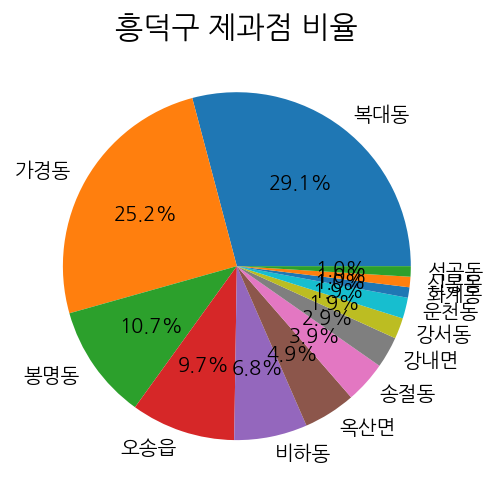

In [121]:
s.plot.pie(label='', autopct='%.1f%%')
plt.title('흥덕구 제과점 비율',fontsize=15)
plt.show()